In [103]:
import numpy as np
from sklearn.cluster import *
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as sm

In [104]:
import pymysql
conn = pymysql.Connect(  # 配置数据库
    host='1.15.220.155',
    port=3306,
    user='test',
    password='991125',
    db='spider',
    charset='UTF8'
)
cursor = conn.cursor()

sql = 'select domain, layout_group, tfidf_group, app_group, ipc_code from cluster'
cursor.execute(sql)

dataset = cursor.fetchall()

In [105]:
temp_X = pd.DataFrame(dataset)
domains = temp_X[[0]]
X = temp_X[[1, 2, 3, 4]]
print(X)
print(domains)

        1    2    3          4
0       0    0    0  104021040
1       1    1    1  172247129
2       2    2    0  172067145
3       3    3    0  104021043
4       4    4    2  023224179
...    ..  ...  ...        ...
10976   8  844    1  118107046
10977   6   27    8  104021028
10978   8  316  153  027124041
10979   8  917  204  168206066
10980  66  855    1  122010161

[10981 rows x 4 columns]
                   0
0         0047yy.com
1          007ps.com
2          00ysw.com
3       01kankan.com
4      021juyuan.com
...              ...
10976     zzrxbw.com
10977     zztxby.com
10978       zzw5.com
10979     zzxsms.com
10980     zzzcet.com

[10981 rows x 1 columns]


In [106]:
X = StandardScaler().fit_transform(X)
print(X[0])

[-0.80339163 -1.31037414 -0.93800638 -0.25769159]


In [107]:
print(X.shape)

(10981, 4)


In [108]:
# for i in range(1,50,2):
# Compute DBSCAN
db = AgglomerativeClustering(distance_threshold=0.15, n_clusters=None).fit(X)
# db = DBSCAN(eps=0.2, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(i)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

601
Estimated number of clusters: 5047
Silhouette Coefficient: 0.506


In [109]:
count = {}
for label in labels:
    if count.get(label):
        count[label]+=1
    else:
        count[label]=1

In [110]:
number = 0
for i in count.values():
    if i == 1:
        number+=1
print(number)

2922


In [111]:
print(labels)

[  21 2504 2504 ... 1955  818  150]


In [112]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D # 空间三维画图
# fig = plt.figure()
# df = pd.DataFrame(X, columns=['1', '2', '3'])
# x=df['1']
# y=df['2']
# z=df['3']
# ax = Axes3D(fig)
# ax.scatter(x,y,z,c=labels)

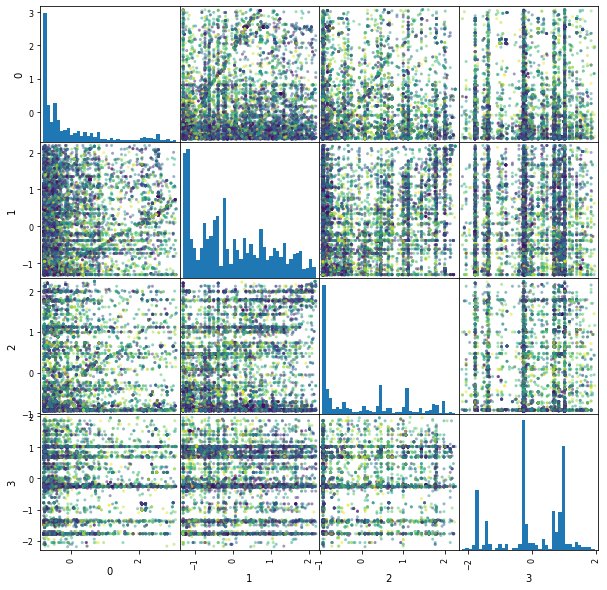

In [113]:
df = pd.DataFrame(X)
grr = pd.plotting.scatter_matrix(df,c = labels,hist_kwds={'bins':40}, figsize=[10,10])

In [114]:
# import pymysql
# conn = pymysql.Connect(  # 配置数据库
#     host='1.15.220.155',
#     port=3306,
#     user='test',
#     password='991125',
#     db='spider',
#     charset='UTF8'
# )
# cursor = conn.cursor()

# sql = 'select ipc from cluster'
# cursor.execute(sql)
# res = cursor.fetchall()
# count = 1
# for ip in res:
#     m = 0
#     sum = 0
#     ip = ip[0]
#     numbers = ip.split('.')
#     for n in numbers:
#         sum += int(n) * (count + m)
#         m += 1
#     sql = 'update cluster set ipc_sum = %s where ipc = %s'
#     cursor.execute(sql,[sum, ip])
#     conn.commit()

In [115]:
from sklearn.neighbors import NearestNeighbors
from random import sample
import numpy as np
import pandas as pd
from numpy.random import uniform

def hopkins_statistic(x):
	d = x.shape[1]
	n = len(x)
	m = int(0.1*n)
	nbrs = NearestNeighbors(n_neighbors=1).fit(x.values)
	rand_x = sample(range(0,n),m)
	ujd = []
	wjd = []
	for j in range(0,m):
		u_dist, _ = nbrs.kneighbors(uniform(np.min(x,axis=0), np.max(x, axis=0), d).reshape(1,-1), 2)
		ujd.append(u_dist[0][1])
		w_dist, _ = nbrs.kneighbors(x.iloc[rand_x[j]].values.reshape(1, -1), 2)
		wjd.append(w_dist[0][1])
	h = sum(ujd)/(sum(ujd)+sum(wjd))
	if np.isnan(h):
		print(ujd, wjd)
		h = 0
	return h
print(hopkins_statistic(pd.DataFrame(X)))

0.8264475068225416


In [116]:
import pymysql
conn = pymysql.Connect(  # 配置数据库
    host='1.15.220.155',
    port=3306,
    user='test',
    password='991125',
    db='spider',
    charset='UTF8'
)
cursor = conn.cursor()

sql = 'update cluster set label = %s where domain = %s'
for i in range(len(labels)):
    cursor.execute(sql, [labels[i], domains.iloc[i][0]])
    print(sql%(labels[i], domains.iloc[i][0]))
    conn.commit()

update cluster set label = 21 where domain = 0047yy.com
update cluster set label = 2504 where domain = 007ps.com
update cluster set label = 2504 where domain = 00ysw.com
update cluster set label = 21 where domain = 01kankan.com
update cluster set label = 831 where domain = 021juyuan.com
update cluster set label = 831 where domain = 027jwl.com
update cluster set label = 831 where domain = 0436da.com
update cluster set label = 525 where domain = 0510yg.com
update cluster set label = 445 where domain = 0514ps.com
update cluster set label = 525 where domain = 0533fang.com
update cluster set label = 831 where domain = 0550cq.com
update cluster set label = 21 where domain = 0668yy.com
update cluster set label = 1314 where domain = 07103333335.com
update cluster set label = 1314 where domain = 0733vod.com
update cluster set label = 3711 where domain = 0792zsw.com
update cluster set label = 831 where domain = 0793gc.net
update cluster set label = 1708 where domain = 07ml.com
update cluster set